In [1]:
#Import packages
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import fftpack
%matplotlib inline
font_size = 10
font_family = 'serif'
# Set Font Parameters
font = {'family': font_family, 'size': font_size}
plt.rc('font', **font)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


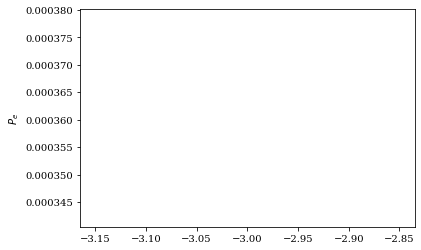

In [10]:
#Non degenerate Lambda steady state function
ustate = basis(3,0)
excited = basis(3,1)
ground = basis(3,2)

nsteps=100
delta_min=-3
delta_max=3
xmin=delta_min
xmax=delta_max 
d=(delta_max-delta_min)*(nsteps)**(-1) 
omega1=0.1
omega2=2
phi=0

#decay rates 
gamma_eu=0.1 
gamma_eg = 5


sigma_ee = tensor(excited * excited.dag())
sigma_uu = tensor(ustate * ustate.dag())
sigma_gg = tensor(ground * ground.dag())
sigma_ue = tensor(ustate * excited.dag())
sigma_ge = tensor(ground * excited.dag())

clist=[]
dlist=[]

#collapse operators 
c1=np.sqrt(gamma_eg)*sigma_ge 
c2=np.sqrt(gamma_eu)*sigma_ue 
c1dc1=c1.dag()*c1 
c2dc2=c2.dag()*c2 

for i in range (0,nsteps+1):
#system hamiltonian 
    H=(-delta_min)*(sigma_ee-sigma_gg)+(phi)*(sigma_ee-sigma_uu)+ omega1*(sigma_ge+sigma_ge.dag())+omega2*(sigma_ue+sigma_ue.dag()) 

#Liouvillian
L=liouvillian(H,[c1,c2])
rho_ss=steadystate(L)
prob_excited=rho_ss[1,1]

clist.append(prob_excited)
dlist.append(delta_min)
delta_min=delta_min+d

plt.figure(1)
plt.plot(dlist,clist)
plt.ylabel(r'$P_e$')
plt.show()




([], <a list of 0 Text yticklabel objects>)

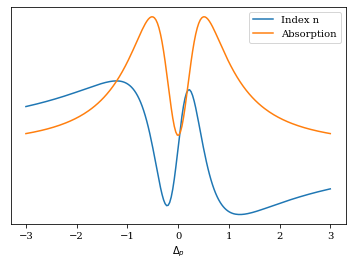

In [11]:
one, two, three = basis(3,0), basis(3,1), basis(3,2)
sig_11 = one * one.dag()
sig_22 = two * two.dag()
sig_33 = three * three.dag()
sig_13 = one * three.dag()
sig_23 = two * three.dag()
sig_12 = one * two.dag()


gamma_p = 1 # decay rate on probe transition
gamma_c = 1 # decay rate on coupling transition
gamma = 0.05 # ground coherence decay
deltaC = 0 # coupling field detuning
omegaP = 0.01 # Rabi freq. for probe
omegaC = 1.0 # Rabi freq. for control

c1 = np.sqrt(gamma_p)*sig_13 # 1-3 coherence decay
c2 = np.sqrt(gamma_c)*sig_23 # 2-3 coherence decay
c3 = np.sqrt(gamma)*sig_12 # 1-2 coherence decay
collapse = [c1,c2,c3]

# create list of delta_p values
deltalist = np.linspace(-3,3,200)

# empty list to save results
chi = [] # susceptibility

for deltaP in deltalist:
    H = -1/2*Qobj([[0,0,omegaP],[0,2*(deltaP - deltaC),omegaC],[omegaP, omegaC, 2*deltaP]])
    rho_ss = steadystate(H,collapse)
    chi.append(expect(sig_13,rho_ss))

plt.plot(deltalist,np.real(chi),label="Index n")
plt.plot(deltalist,np.imag(chi),label="Absorption")
plt.legend()
plt.xlabel("$\Delta_p$")
plt.yticks([])